# Лекция 3: Квантили, доверительные интервалы и распределения, производные от нормального.

### Пример для узнаваемости продукта:

Представим, что вы сделали некий новый продукт, например специальный вид матраца для качественного сна, и хотите выяснить, насколько хорошо людям ваш продукт известен. Можно определить бинарную случайную величину, которая эту ситуацию будет описывать: пусть эта величина - $X = 1$, если член целевой аудитории знает о вашем продукте, и $X = 0$, если член целевой аудитории не знает о вашем продукте. Такие исследования часто называют "измерениями узнаваемости бренда". Это величина с распределением Бернулли и параметром $p$ (вероятность узнавания), который вы хотите измерить.

Соберем выборку респондентов (Она должна быть репрезентативной, то есть отражать параметры генеральной совокупности) и зададим им вопрос : "Знаете ли вы о наших чудо-матрацах?". Ответы респондентов составят выборку из нашего распределения Бернулли - список из нулей и единиц. Тогда наша оценка узнаваемости – доля единиц в выборке. Возникает вопрос: а сколько респондентов нам нужно опросить? 

Давайте попробуем несколько вариантов. Мы опросили сначала 20 человек, 10 из них о наших матрацах знают, тогда оценка нашего $p$ по выборке есть $\frac{1}{2}$. Затем опросим 200 человек. И из них уже 90 знает о наших матрацах. Наша оценка $p$ по другой выборке есть $0.45$. Какой из вариантов нам больше подойдет? Какой из них точнее? Здравый смысл подсказывает, что второй – там же больше наблюдений. Для оценки этой точности нам поможет понятие доверительного интервала:

**Определение** Доверительным интервалом для параметра $\theta$ называют такую пару статистик $l$ и $r$, что $P(l\le\theta\le r)\ge 1-\alpha$. 

Здесь $\theta$ - наш оцениваемый параметр, а $1-\alpha$ называют уровнем доверия.

Смысл здесь такой: Если повторять наш эксперимент бесконечно (чтобы частотные оценки превратились в вероятности), то наш доверительный интервал будет включать в себя истинное значение $\theta$ в $100(1-\alpha)$ процентах случаев.

Наша оценка – выборочное среднее, а если респондентов много, можно применить центральную предельную теорему:
$$p\approx N(E(X),\frac{\sigma^2(X)}{n})$$

Для распределения Бернулли $E(X) = p$ , а $\sigma^2(X)=p(1-p)$

**ВНИМАНИЕ!** $p$ нам неизвестно, самое лучшее, что мы о нем можем сказать – дать оценку p по выборке, то есть заменить в формуле нормального распределения $p$ на $\overline{p}$. И тогда получаем:
$$p\approx N(\bar{p},\frac{\bar{p}(1-\bar{p})}{n})$$

А теперь "правило двух сигм" (там было как раз 95% вероятностной массы):

$$P(\overline{p}-2\sqrt{\frac{\bar{p}(1-\bar{p})}{n}} \le p \le \overline{p}+2\sqrt{\frac{\bar{p}(1-\bar{p})}{n}})\approx 0.95$$ 

А значит теперь мы получаем оценки доверительных интервалов для наших случаев:
* Для выборки из 20 наблюдений интервал имеет вид: 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
a = np.random.exponential(1, size = 2000)
b = np.random.exponential(1.1, size = 2000)

In [2]:
np.random.exponential??

In [5]:
xx = [1,2,3,4,5]

In [7]:
np.random.choice(xx, replace = True, size = (2,5))

array([[3, 2, 5, 5, 3],
       [3, 5, 5, 4, 3]])

In [4]:
1.1 - 1

0.10000000000000009

In [9]:
a_ = np.random.choice(a, replace = True, size = (2000, 1000)).mean(axis = 0)
b_ = np.random.choice(b, replace = True, size = (2000, 1000)).mean(axis = 0)

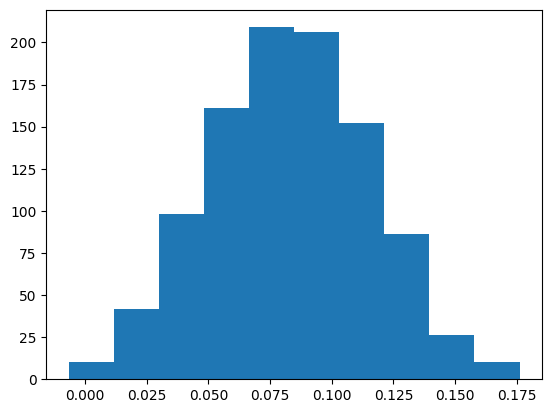

In [17]:
_ = plt.hist(b_ - a_)

In [18]:
interval = np.percentile(b_ - a_, [2.5,97.5])
interval

array([0.02240688, 0.14518824])

In [22]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
x = np.random.normal(1,2,size = n)

In [23]:
x.mean()

0.9629727131385221

In [24]:
n_samples = 1000
weights = np.random.binomial(n, 1/n, size = (n_samples, n))
weights_poisson = np.random.poisson(1, size = (n_samples, n))

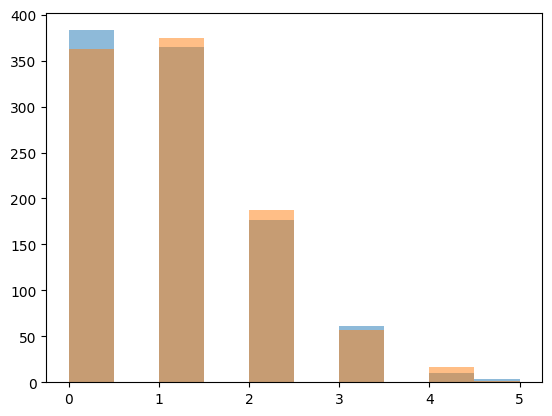

In [27]:
_ = plt.hist(weights[0], alpha = 0.5)
_ = plt.hist(weights_poisson[0], alpha = 0.5)

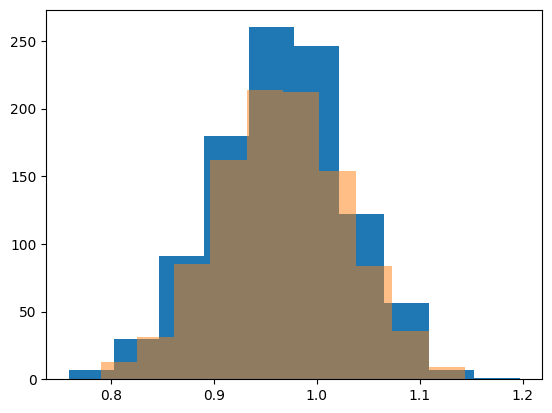

In [25]:
_ = plt.hist((weights@x)/weights.sum(axis=1))
_ = plt.hist((weights_poisson@x)/weights_poisson.sum(axis=1), alpha = 0.5)

In [28]:
((weights@x)/weights.sum(axis=1)).mean()

0.9651484688794845

In [29]:
np.percentile((weights@x)/weights.sum(axis=1), 
              q = [2.5, 97.5])

array([0.83753254, 1.08886514])

In [30]:
np.percentile((weights_poisson@x)/weights_poisson.sum(axis=1), 
              q = [2.5, 97.5])

array([0.85143938, 1.08912777])

# Параметрический бутстреп

In [31]:
mu = x.mean()
std = x.std()

np.percentile(np.random.normal(mu, std, size = (n_samples, n)).mean(axis = 0), 
              q = [2.5, 97.5])

array([0.8439935 , 1.08183332])

In [2]:
from math import sqrt
p = 0.5
n = 20
interval = 2*sqrt(p*(1-p)/n)

print(f'[{p-interval}, {p+interval}]')

[0.27639320225002106, 0.7236067977499789]


* Для выборки из 200 наблюдений интервал имеет вид: 

In [3]:
p = 0.45
n = 200
interval = 2*sqrt(p*(1-p)/n)

print(f'[{p-interval}, {p+interval}]')

[0.37964376360264857, 0.5203562363973515]


Доверительный интервал указывает на неопределенность в нашей оценке параметра. Заметьте, что с увеличением количества наблюдений интервал становится уже, а это и означает, что чем больше наблюдений, тем выше точность. Вообще говоря, не обязательно использовать ЦПТ для построения интервалов - часто, когда распределение известно, можно найти метод получше, но метод оценки через ЦПТ довольно универсален и часто будет вам пригождаться.

# Интервальные оценки
Здесь мы с вами использовали правило "двух сигм" для построения доверительного интервала для Бернуллиевской случайной величины с помощью нормального приближения (Центральной Предельной Теоремы). 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Standard_deviation_diagram_%28decimal_comma%29.svg/325px-Standard_deviation_diagram_%28decimal_comma%29.svg.png" width="500">

На самом деле "два сигма" это приближенное значение. Попробуем его уточнить. Для этого надо дать вероятностное определение квантиля (Напоминаю, что для выборок мы договорились, что n-процентный квантиль - такое число, что ниже него лежит n процентов наблюдений в выборке)

Квантилем порядка $\alpha$ называют такую величину  $X_{\alpha}$, что $$P(X\le X_{\alpha})\ge \alpha$$ и $$P(X\ge X_{\alpha})\ge 1-\alpha$$

Тогда для правила "двух сигм" наши границы интервала $$P(l\le X \le r) = 1-\alpha$$  
Будут в точности равны $X_{0.025}$ и $X_{0.975}$, то есть:
$$P(X_{0.025}\le X \le X_{0.975}) = 0.95$$

Тогда для произвольного квантиля ситуация будет такая:

$$P(X_{\frac{\alpha}{2}} \le X \le X_{1-\frac{\alpha}{2}}) = 1-\alpha$$

Полученный нами интервал называют предсказательным интервалом $[X_{\frac{\alpha}{2}},X_{1-\frac{\alpha}{2}}]$
Заметьте, что здесь случайной является величина в центре, а границы задаются параметрами распределения генеральной совокупности.

В случае нормального распределения $X \sim N(\mu,\sigma^2)$ этот интервал можно выразить через соответствующие квантили стандартного нормального распределения, то есть $N(0,1)$ в таком виде:



$$P(\mu - z_{1-\frac{\alpha}{2}}\sigma \le X \le \mu + z_{1-\frac{\alpha}{2}}\sigma) = 1-\alpha$$

где $z_{1-\frac{\alpha}{2}}=z_{\frac{\alpha}{2}}$ - квантиль стандартного нормального распределения.

А равенство выше выполняется из-за того, что нормальное распределение симметрично.

Как раз $z_{0.025}\approx 1.96 \approx 2$

Вот оно - правило двух сигм :)

В свою очередь доверительный интервал для мат.ожидания (интервальная оценка характеристики генеральной совокупности, сделанная по выборке), примет такой вид:

$$P(\overline{X_n} - z_{1-\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}} \le \mu \le \overline{X_n} + z_{1-\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Еще раз, предсказательный интервал говорит, где будет находиться наша случайная величина при условии знания распределения генеральной совокупности(ее дисперсии и математического ожидания), а доверительный – где будет находиться значение статистики в генеральной совокупности(ее мат.ожидание) при условии знания выборки :)

Здесь мы взяли какую-то оценку $\mu$, а именно - выборочное среднее, а $\sqrt{n}$ появился как следствие центральной предельной теоремы для среднего (по выборке длины n стандартное отклонение уменьшается в $\sqrt{n}$ раз)

# Распределения, производные от нормального

## Хи-квадрат

Пусть у нас есть k независимых случайных величин, распределенных стандартно нормально:
$$X_1...X_n \sim N(0,1)$$

Тогда говорят, что величина $$X = \sum_{i=1}^k{X_i^2}$$ 
имеет распределение Хи-квадрат с k степенями свободы.

плотность распределения имеет жутковатый вид, поэтому мы выписывать такое не будем. Но пользоваться им это нам не помешает. При разных k графики функции распределения имеют различный вид. Ниже приведены графики для k = 1,2,3,4

/var/folders/t5/3hn40ss10rz402rc6dg3_jqm0000gp/T/ipykernel_70604/988752697.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax[0,0].plot(x, chi2.pdf(x, 1),'r-',c='red', lw=2, alpha=0.6, label='chi2 pdf')
/var/folders/t5/3hn40ss10rz402rc6dg3_jqm0000gp/T/ipykernel_70604/988752697.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax[0,1].plot(x, chi2.pdf(x, 2),'r-',c='violet', lw=2, alpha=0.6, label='chi2 pdf')
/var/folders/t5/3hn40ss10rz402rc6dg3_jqm0000gp/T/ipykernel_70604/988752697.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax[1,0].plot(x, chi2.pdf(x, 5),'r-',c='blue', lw=2, alpha=0.6, label='chi2 pdf')
/var/folders/t5/3hn40ss10rz402rc6

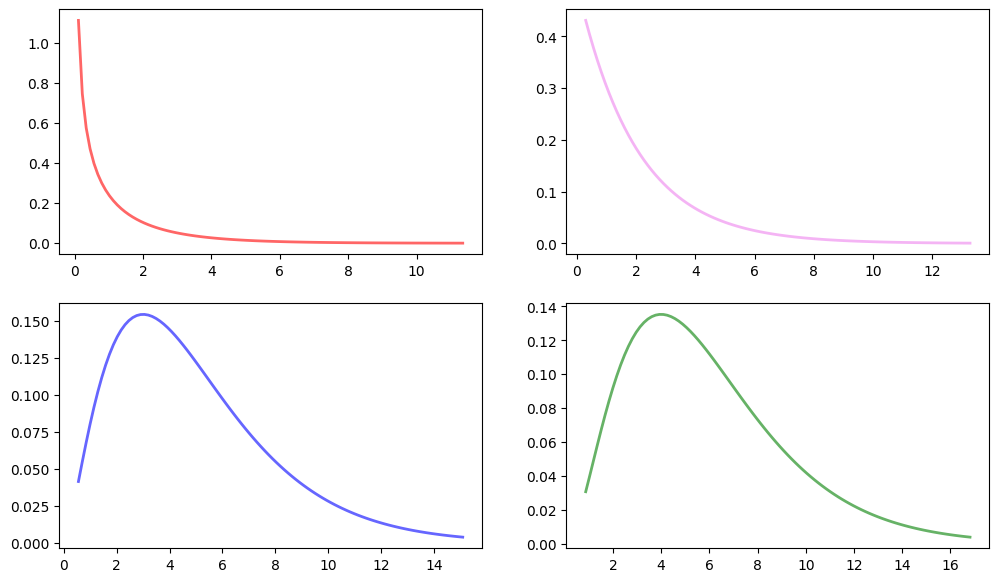

In [6]:
from scipy.stats import chi2
import scipy
import numpy as np
import matplotlib.pyplot as plt

df = [3,4,5,6]

fig, ax = plt.subplots(2, 2, figsize=(12,7))
x = []
pdf = []
# for i in df:   
x = np.linspace(chi2.ppf(0.01, 3),chi2.ppf(0.99, 3), 100)
ax[0,0].plot(x, chi2.pdf(x, 1),'r-',c='red', lw=2, alpha=0.6, label='chi2 pdf')
x = np.linspace(chi2.ppf(0.01, 4),chi2.ppf(0.99, 4), 100)
ax[0,1].plot(x, chi2.pdf(x, 2),'r-',c='violet', lw=2, alpha=0.6, label='chi2 pdf')
x = np.linspace(chi2.ppf(0.01, 5),chi2.ppf(0.99, 5), 100)
ax[1,0].plot(x, chi2.pdf(x, 5),'r-',c='blue', lw=2, alpha=0.6, label='chi2 pdf')
x = np.linspace(chi2.ppf(0.01, 6),chi2.ppf(0.99, 6), 100)
ax[1,1].plot(x, chi2.pdf(x, 6),'r-',c='green', lw=2, alpha=0.6, label='chi2 pdf')

## Распределение Стьюдента

Пусть у нас есть стандартная нормальная случайная величина и величина, распределенная по хи-квадрат с k степенями свободы:
$$X \sim N(0,1)$$
$$Y \sim \chi_k^2$$

Тогда говорят, что величина $$\phi = \frac{X}{\sqrt{Y/k}}$$ 
имеет распределение Стьюдента с k степенями свободы.

Ниже приведены графики для k = 1,2,3,4

/var/folders/t5/3hn40ss10rz402rc6dg3_jqm0000gp/T/ipykernel_70604/2009377376.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, t.pdf(x, 1),'r-',c='red', lw=2, alpha=0.6, label='student pdf')
/var/folders/t5/3hn40ss10rz402rc6dg3_jqm0000gp/T/ipykernel_70604/2009377376.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, t.pdf(x, 2),'r-',c='violet', lw=2, alpha=0.6, label='student pdf')
/var/folders/t5/3hn40ss10rz402rc6dg3_jqm0000gp/T/ipykernel_70604/2009377376.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, t.pdf(x, 3),'r-',c='blue', lw=2, alpha=0.6, label='student pdf')
/var/folders/t5/3hn40ss10rz402rc6dg3_jqm0000g

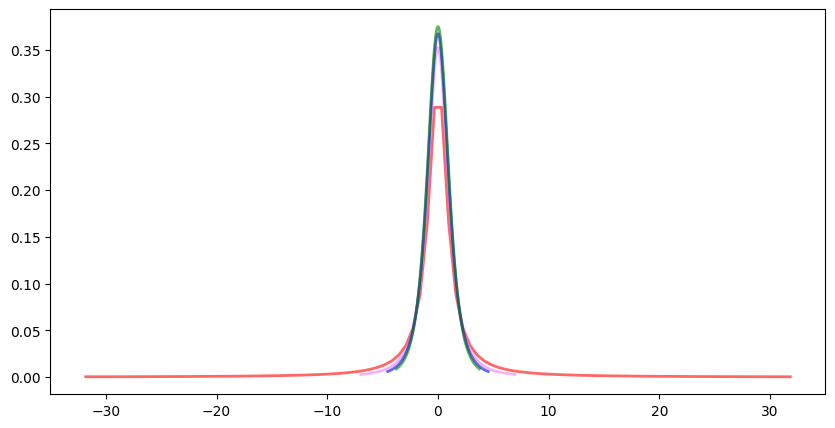

In [7]:
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt

df = [1,2,3,4]

fig, ax = plt.subplots(1, 1, figsize=(10,5))
x = []
pdf = []
# for i in df:   
x = np.linspace(t.ppf(0.01, 1),t.ppf(0.99, 1), 100)
ax.plot(x, t.pdf(x, 1),'r-',c='red', lw=2, alpha=0.6, label='student pdf')
x = np.linspace(t.ppf(0.01, 2),t.ppf(0.99, 2), 100)
ax.plot(x, t.pdf(x, 2),'r-',c='violet', lw=2, alpha=0.6, label='student pdf')
x = np.linspace(t.ppf(0.01, 3),t.ppf(0.99, 3), 100)
ax.plot(x, t.pdf(x, 3),'r-',c='blue', lw=2, alpha=0.6, label='student pdf')
x = np.linspace(t.ppf(0.01, 4),t.ppf(0.99, 4), 100)
ax.plot(x, t.pdf(x, 4),'r-',c='green', lw=2, alpha=0.6, label='student pdf')

/var/folders/t5/3hn40ss10rz402rc6dg3_jqm0000gp/T/ipykernel_31756/1278326274.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  _ = ax.plot(y, norm.pdf(y),'r-',c='red', lw=2, alpha=0.6, label='Norm pdf')


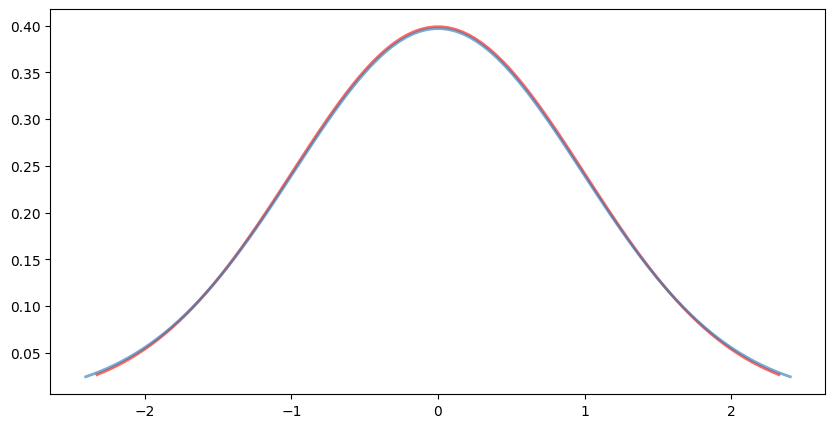

In [55]:
from scipy.stats import t, norm
fig, ax = plt.subplots(1, 1, figsize=(10,5))
x = []
pdf = []
# for i in df:   
x = np.linspace(t.ppf(0.01, 50),t.ppf(0.99, 50), 100)
y = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
_ = ax.plot(y, norm.pdf(y),'r-',c='red', lw=2, alpha=0.6, label='Norm pdf')
_ = ax.plot(x, t.pdf(x, 50),lw=2, alpha=0.6, label='student pdf')

Такое распределение всегда имеет центр в нуле и , хотя и похоже на нормальное, имеет "более тяжелые хвосты". Так говорят, когда вероятность значений сильно отклоняющихся от среднего, выше, чем у нормального. При больших k распределение Стьюдента слабо отличается от нормального распределения (при k > 30-40 на глаз не отличишь)

## Распределение Фишера

Пусть у нас есть две независимые случайные величины, распределенные по хи-квадрат с k и m степенями свободы соответственно:
$$X \sim \chi_k^2$$
$$Y \sim \chi_m^2$$

Тогда говорят, что величина $$\psi = \frac{X/k}{Y/m}$$ 
имеет распределение Фишера с параметрами k и m.

плотность распределения имеет жутковатый вид, поэтому мы выписывать такое не будем. Но пользоваться им это нам не помешает. При разных k графики функции распределения имеют различный вид. Ниже приведены графики для (1,1) (2,2) (3,3) и (4,4)

/var/folders/t5/3hn40ss10rz402rc6dg3_jqm0000gp/T/ipykernel_70604/35959885.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax[0,0].plot(x, f.pdf(x, 1,1),'r-',c='red', lw=2, alpha=0.6, label='student pdf')
/var/folders/t5/3hn40ss10rz402rc6dg3_jqm0000gp/T/ipykernel_70604/35959885.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax[0,1].plot(x, f.pdf(x, 2,2),'r-',c='violet', lw=2, alpha=0.6, label='student pdf')
/var/folders/t5/3hn40ss10rz402rc6dg3_jqm0000gp/T/ipykernel_70604/35959885.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax[1,0].plot(x, f.pdf(x, 3,3),'r-',c='blue', lw=2, alpha=0.6, label='student pdf')
/var/folders/t5/3hn40ss10rz402

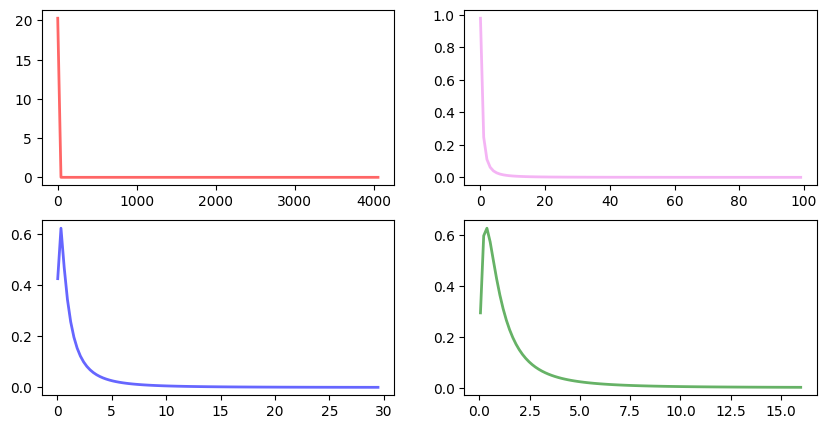

In [8]:
from scipy.stats import f
import numpy as np
import matplotlib.pyplot as plt

df = [1,2,3,4]

fig, ax = plt.subplots(2, 2, figsize=(10,5))
x = []
pdf = []
x = np.linspace(f.ppf(0.01, 1,1),f.ppf(0.99, 1,1), 100)
ax[0,0].plot(x, f.pdf(x, 1,1),'r-',c='red', lw=2, alpha=0.6, label='student pdf')
x = np.linspace(f.ppf(0.01, 2,2),f.ppf(0.99, 2,2), 100)
ax[0,1].plot(x, f.pdf(x, 2,2),'r-',c='violet', lw=2, alpha=0.6, label='student pdf')
x = np.linspace(f.ppf(0.01, 3,3),f.ppf(0.99, 3,3), 100)
ax[1,0].plot(x, f.pdf(x, 3,3),'r-',c='blue', lw=2, alpha=0.6, label='student pdf')
x = np.linspace(f.ppf(0.01, 4,4),f.ppf(0.99, 4,4), 100)
ax[1,1].plot(x, f.pdf(x, 4,4),'r-',c='green', lw=2, alpha=0.6, label='student pdf')

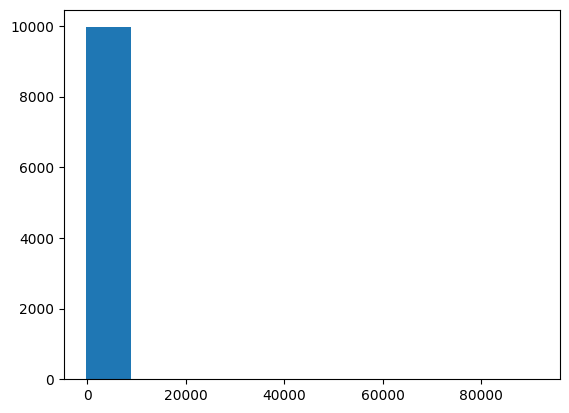

In [44]:
import matplotlib.pyplot as plt

x = np.random.lognormal(1,3, size = 10000)

sample_mean = x.mean()
sample_std = x.std(ddof=1)

_ = plt.hist(x - sample_mean)

In [45]:
sigmas = 1.96

sample_mean - sigmas*sample_std/100, sample_mean + sigmas*sample_std/100

(155.41581496453796, 229.32963614587345)

In [46]:
np.exp(1+3**2/2)

244.69193226422038

# Зачем мы городили огород?

Взглянем еще раз на нормальное распределение.
Если $$X \sim N(\mu,\sigma^2)$$

То выборочное среднее $$\overline{X_n} \sim N(\mu,\frac{\sigma^2}{n})$$

А выборочная дисперсия имеет вид:$$S_n^2 = \frac{1}{n-1}\sum(X_i-\overline{X_n})^2$$

В скобках стоит сумма квадратов нормально распределенных случайных величин! Следовательно выборочная дисперсия имеет распределение хи-квадрат с точностью до нормировки, а именно:
$$(n-1)\frac{S_n^2}{\sigma^2} \sim \chi^2_{n-1}$$

Еще одна крайне полезная величина, получаемая из нормального распределения, имеет распределение Стьюдента. Это так называемая T-статистика:
$$\frac{\bar{X_n} - \mu}{S_n/\sqrt{n}} \sim St(n-1)$$

Ну а если у нас будет две нормальные выборки вида:
$$X_1 \sim N(\mu_1,\sigma_1^2)$$
$$X_2 \sim N(\mu_2,\sigma_2^2)$$

Тогда величина $$\frac{S_1^2/\sigma_1^2}{S_2^2/\sigma_2^2} \sim Fisher(n_1-1,n_2-1)$$

Ну а теперь, когда мы знаем многие необходимые распределения, займемся построением доверительных интервалов.

## Доверительный интервал для среднего:

In [15]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

Представим, что у нас есть выборка из большой группы людей, у которых мы измеряем вес. Вес в этой группе распределен нормально со средним 70 кг и стандартным отклонением 5 кг.

In [9]:
import numpy as np
from numpy.random import normal
from scipy.stats import norm

Text(0.5, 1.0, 'Normal distribution pdf')

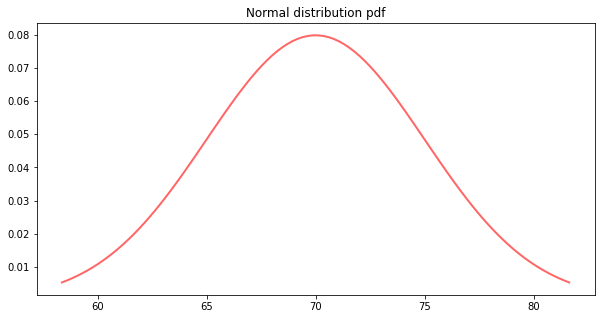

In [10]:
# Случайная выборка
sample = np.array([normal(70,5) for _ in range(1000)])

fig, ax = plt.subplots(1, 1, figsize=(10,5))
x = []
pdf = []
x = np.linspace(norm.ppf(0.01, 70,5),norm.ppf(0.99, 70,5), 100)
ax.plot(x, norm.pdf(x, 70,5),'r-',c='red', lw=2, alpha=0.6, label='Norm pdf')
ax.set_title('Normal distribution pdf')

### Точечная оценка

In [13]:
print(f"Среднее {sample.mean()}, Стандартное отклонение {sample.std(ddof=1)}")

Среднее 70.07218498248517, Стандартное отклонение 4.851556689770711


### Интервальная оценка

#### z-интервал
Если нам вдруг нам стало известно значение дисперсии в генеральной совокупности, то интервал для среднего в выборке можно получить как:

$$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

In [16]:
sigma = 5
print("95% Доверительный интервал для среднего", _zconfint_generic(sample.mean(), 
                                                                  sqrt(5/len(sample)), 
                                                                  0.05, 'two-sided'))

95% Доверительный интервал для среднего (69.9335946000502, 70.21077536492014)


#### t-интервал
В действительности дисперсия нам неизвестна. И поэтому вместо дисперсии генеральной совокупности нам надо подставить ее выборочную оценку, а вместо квантиля нормального распределения - квантиль распределения Стьюдента.
$$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

Еще раз отметим, что при количестве наблюдений > 30-40 распределение Стьюдента почти не отличается от нормального, так что можно вместо $t_{1-\frac{\alpha}{2}}$ брать $z_{1-\frac{\alpha}{2}}$

In [17]:
sample_std = sample.std(ddof=1)/sqrt(len(sample))

In [18]:
print("95% Доверительный интервал для среднего", _tconfint_generic(sample.mean(), sample_std,
                                                                       len(sample) - 1,
                                                                       0.05, 'two-sided'))

95% Доверительный интервал для среднего (69.77112315722883, 70.37324680774151)


## Доверительный интервал для доли 

Некоторые часто встречающиеся случайные величины имеют бинарные значения (клики в рекламные баннеры, отток пользователей, возвращаемость на сайт в течение недели и многое другое). Для них тоже нужно уметь строить доверительные интервалы.

In [47]:
general = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]

sample = np.random.choice(general, size = 5047, replace = True)

In [10]:
len(general)

25

Истинное значение доли в генеральной совокупности есть

In [11]:
np.mean(general)

0.04

Давайте посмотроим доверительный интервал для этой бернуллиевской случайной величины **на основе нормального распределения (ЦПТ)**:

$$p \pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{p\left(1-p\right)}{n}}$$

Здесь *p* - наша оценка доли по выборке.

In [48]:
from statsmodels.stats.proportion import proportion_confint
normal_interval = proportion_confint(sum(sample), len(sample), method = 'normal')

In [49]:
normal_interval

(0.03350477229669835, 0.044165130615923004)

In [14]:
normal_interval[-1]-normal_interval[0]

0.010475814194451288

Существует множество методов уточнения этой оценки, один из которых обязатиельно стоит упомянуть - это **метод Уилсона**. Интервал в этом случае примет вид:

$$\frac1{ 1 + \frac{z^2}{n} } \left(p + \frac{z^2}{2n} \pm z \sqrt{ \frac{p\left(1-p\right)}{n} + \frac{
z^2}{4n^2} } \right)$$

Здесь $z == z_{1-\frac{\alpha}{2}}$ , а *p* - наша оценка доли по выборке.

In [15]:
normal_interval = proportion_confint(sum(sample), len(sample), method = 'wilson')

In [16]:
normal_interval

(0.03255206654953731, 0.04304750669659051)

In [17]:
normal_interval[-1] - normal_interval[0]

0.010495440147053198

Еще одно полезное знание, которое мы можем отсюда извлечь - способ расчета размера выборки, необходимого для получения интервала заданой ширины. Сделать это можно с помощью соответствующей функции из statsmodels

In [45]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [47]:
# 0.01 - половина ширины интервала
sufficient_size = int(np.ceil(samplesize_confint_proportion(sample.mean(), 0.005))) 
sufficient_size

5047

In [84]:
sample2 = np.random.choice(general, size = sufficient_size)

In [85]:
normal_interval2 = proportion_confint(sum(sample2), len(sample2), method = 'normal')

In [86]:
normal_interval2

(0.4957547187917671, 0.5057553046396309)

In [87]:
normal_interval2[-1] - normal_interval2[0]

0.010000585847863841

## Доверительный интервал для разности долей в случае двух выборок

Пусть проводится тест новой промомеханики: часть пользователей интернет-магазина получает скидку на определенную категорию товаров, а потом измеряется, сделали они заказ в этой категории или нет. Так мы сможем посмотреть, увеличивается ли количество заказов в нашей категории в случае использования промомеханики

In [50]:
import scipy

In [51]:
np.random.seed(45)
group_a = np.random.binomial(n = 1, p = 0.08, size = 1000) 
group_b = np.random.binomial(n = 1, p = 0.06, size = 1000) 

Можно построить оценку в виде доверительного интервала Уилсона для каждой из выборок:

In [54]:
interval_group_a = proportion_confint(group_a.sum(), len(group_a), method = 'wilson')
interval_group_b = proportion_confint(group_b.sum(), len(group_b), method = 'wilson')

In [55]:
print('Интервальная оценка для А',interval_group_a)
print('Интервальная оценка для В',interval_group_b)

Интервальная оценка для А (0.06745502144289929, 0.10173649513405368)
Интервальная оценка для В (0.04513327823499824, 0.0742495762662325)


Доверительные интервалы пересекаются, значит ли это , что доли в выборках неотличимы?

Нет, мы должны построить доверительный интервал для разности:

$$p_1 - p_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{p_1(1 - p_1)}{n_1} + \frac{p_2(1 - p_2)}{n_2}}$$

In [56]:
def difference_in_proportions(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    n1 = len(sample1)
    n2 = len(sample2)
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2
    
    l = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    r = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    
    return (l, r)

In [57]:
print("Интервал для разности долей:", difference_in_proportions(group_a, group_b))

Интервал для разности долей: (0.002588859546437741, 0.04741114045356226)


Интервал пересекает ноль, значит разность статистически не значима :)

До сих пор мы говорили о независимых выборках (пользователи из одной группы получили скидку, а из другой – нет), но так бывает не всегда. Например мы могли показать два разных рекламных баннера одной и той же выборке людей (тогда при оценке интервала надо учесть , что выборки связанные). Делается это так:


$X_1$\ $X_2$ | 1 | 0 | $\sum$
--- | --- | --- | ---
1 | a | b | a + b
0 | c | d | c + d
$\sum$ | a + c| b + d | n

$$ p_1 = \frac{a + b}{n}$$

$$ p_2 = \frac{a + c}{n}$$

$$ p_1 - p_2 = \frac{b - c}{n}$$


$$ \frac{b - c}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{b + c}{n^2} - \frac{(b - c)^2}{n^3}}$$

In [101]:
def difference_related_samples(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    b = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    c = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    l = float(b - c) / n  - z * np.sqrt(float((b + c)) / n**2 - float((b - c)**2) / n**3)
    r = float(b - c) / n  + z * np.sqrt(float((b + c)) / n**2 - float((b - c)**2) / n**3)
    return (l, r)

In [102]:
np.random.seed(45)
group_a = np.random.binomial(n = 1, p = 0.07, size = 1000) # Клики группы в первый баннер
group_b = np.random.binomial(n = 1, p = 0.04, size = 1000) # Клики группы во второй баннер

difference_related_samples(group_a, group_b)

(0.013409083935804058, 0.05259091606419594)

Интервал снова не пересекает ноль. Стало быть , тест говорит, что баннер B лучше, чем баннер A.

## Доверительный интервал c помощью бутстрэпа

Представим, что нам нужно построить интервальную оценку для какого-то показателя, о распределении которого мы не знаем ничего. В качестве примера можно взять квантиль 40%. 
Чтоб такой доверительный интервал построить, нам нужно получить выборочное распределение этой статистики. А что если выборка одна и распределение получить нельзя?

Как бы мы получали такое распределение, будь у нас доступ к генеральной совокупности? Понятное дело - мы бы набрали из нее выборок, на каждой из которых посчитали бы искомую статистику, а потом построили соответствующее распределение. Такое нельзя сделать почти никогда.

Есть второй вариант – сделать предположение о характере распределения нашей статистики и оценить параметры этого распределения. Это звучит отлично, если у нас есть какой-то способ понять, как распределена наша статистика теоретически (а по условию мы про это распределение ничего не знаем)

Вариант номер три – бутстрэп. Поскольку генеральная совокупность нам недоступна, давайте в качестве приближения воспользуемся нашей выборкой и начнем генерировать из нее псевдовыборки размера n с возвращением. Получив некоторое количество таких псевдовыборок, оценим по ним распределение нашей статистики.

Возьмем датасет об извержениях гейзера Old Faithful:

In [1]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/curran/4b59d1046d9e66f2787780ad51a1cd87/raw/9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv', sep='\t')
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


переведем длительность извержения в минуты:

In [2]:
df['time']=df['eruptions']*60

In [3]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Красным цветом на рисунке указана выборочная медиана

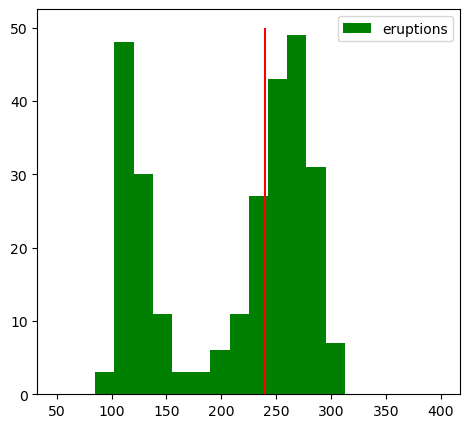

In [4]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(df.time, bins = 20, color = 'green', range = (50, 400), label = 'eruptions')
pylab.vlines(np.median(df['time']),0,50, color = 'red')
pylab.legend()

In [5]:
np.median(df['time'])

240.0

In [6]:
df

,eruptions,waiting,time
0,3.600,79,216.00
1,1.800,54,108.00
2,3.333,74,199.98
3,2.283,62,136.98
4,4.533,85,271.98
...,...,...,...
267,4.117,81,247.02
268,2.150,46,129.00
269,4.417,90,265.02
270,1.817,46,109.02


Дадим интервальную оценку медианного значения длительности извержения:

In [9]:
def bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [10]:
def boundaries_with_quantiles(stat, alpha):
    lr = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return lr

In [14]:
np.random.seed(42)

eruptions = df['time'].values

bootstrapped_medians = list(map(np.mean, bootstrap_samples(eruptions, 1000)))

print("95% доверительный интервал для времени извержения Old Faithful:",  
      boundaries_with_quantiles(bootstrapped_medians, 0.05))

95% доверительный интервал для времени извержения Old Faithful: [200.25829963 216.86498713]


In [10]:
from scipy.stats import ttest_ind

Если немного потрудиться, можно [отсюда](https://geysertimes.org/geyser.php?id=Beehive) достать времена извержений другого гейзера. Давайте попробуем дать интервальную оценку разности медианных времен извержений этих двух гейзеров.

In [15]:
data_raw =[
'4m 35s',
'5m 13s',
'4m 55s',
'4m 46s',
'4m 53s',
'4m 58s ',
'4m 52s ',
'4m 47s ',
'4m 47s ',
'4m 42s ',
'4m 49s ',
'4m 45s ',
'4m 56s ',
'4m 35s ',
'4m 51s',
'4m 42s',
'4m 50',
'4m 39s',
'4m 52s ',
'4m 42s',
'5m 18s',
'4m 53s',
'5m 2s']

Распарсим это дело в секунды, а дальше сделаем так же, как в прошлый раз.

In [16]:
import re
def process(x):
    st = list(map(int,re.findall(r'\d+',x)))
    return st[0]*60+st[1]


In [17]:
data_processed = np.array(list(map(process,data_raw)))

In [24]:
data_processed.shape

(23,)

In [18]:
np.median(data_processed)

290.0

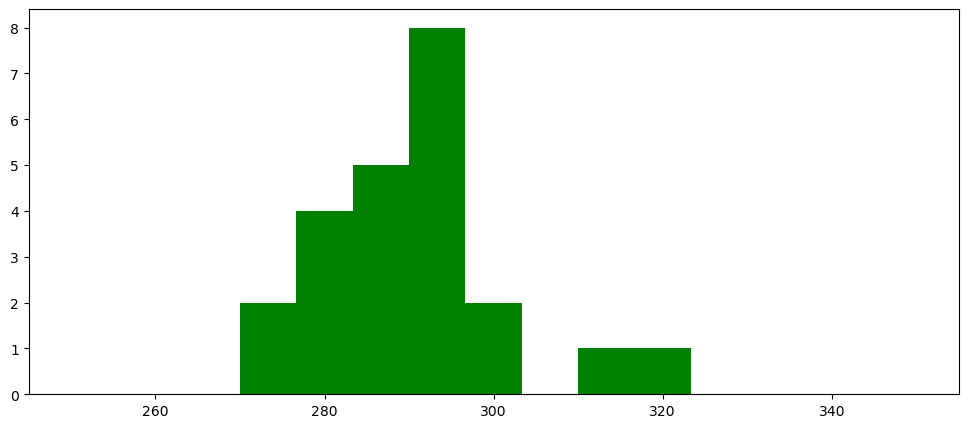

In [30]:
_ = plt.hist(data_processed, bins = 15, color = 'green', range = (250, 350), label = 'eruptions')

In [31]:
bootstrapped_medians_2 = list(map(np.median, bootstrap_samples(data_processed, 1000)))

print("95% доверительный интервал для времени извержения Beehive:",  
      boundaries_with_quantiles(bootstrapped_medians_2, 0.05))

95% доверительный интервал для времени извержения Beehive: [286. 293.]


Тогда точечная оценка разности медиан:

In [18]:
print("Разность:", np.median(data_processed) - np.median(eruptions))

Разность: 50.0


In [44]:
x = np.random.normal(1,2,size = 1000)
y = np.random.normal(2,4,size = 1000)

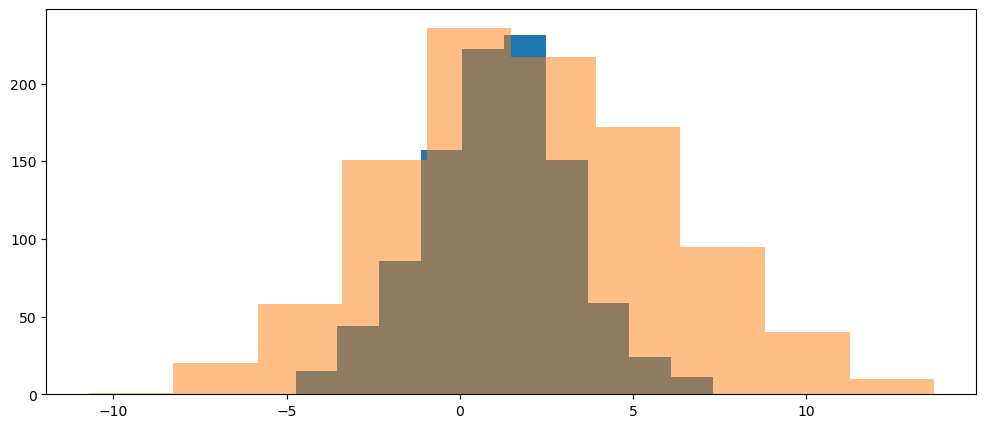

In [45]:
_ = plt.hist(x)
_ = plt.hist(y, alpha = 0.5)

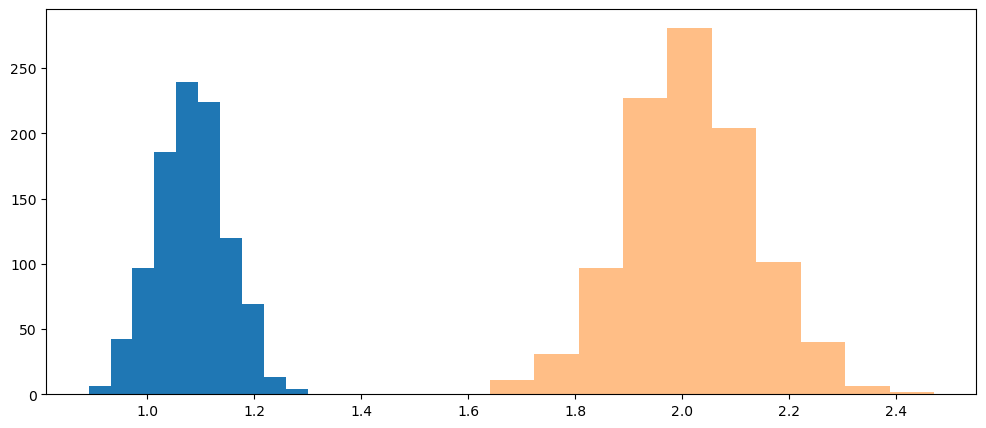

In [46]:
means_x = np.random.choice(x, size = (1000,1000), replace = True).mean(axis = 1)
means_y = np.random.choice(y, size = (1000,1000), replace = True).mean(axis = 1)

_ = plt.hist(means_x)
_ = plt.hist(means_y, alpha = 0.5)

In [47]:
print(boundaries_with_quantiles(means_x, 0.05))
print(boundaries_with_quantiles(means_y, 0.05))

[0.94841489 1.20707024]
[1.77562979 2.24988401]


In [48]:
np.array(boundaries_with_quantiles(means_y, 0.05)) - np.array(boundaries_with_quantiles(means_x, 0.05))

array([0.82721489, 1.04281377])

In [49]:
boundaries_with_quantiles(means_y - means_x, 0.05)

array([0.66611859, 1.20132917])

А доверительный интервал:

In [19]:
median_difference = list(map(lambda x: x[1] - x[0], zip(bootstrapped_medians, 
                                                        bootstrapped_medians_2)))

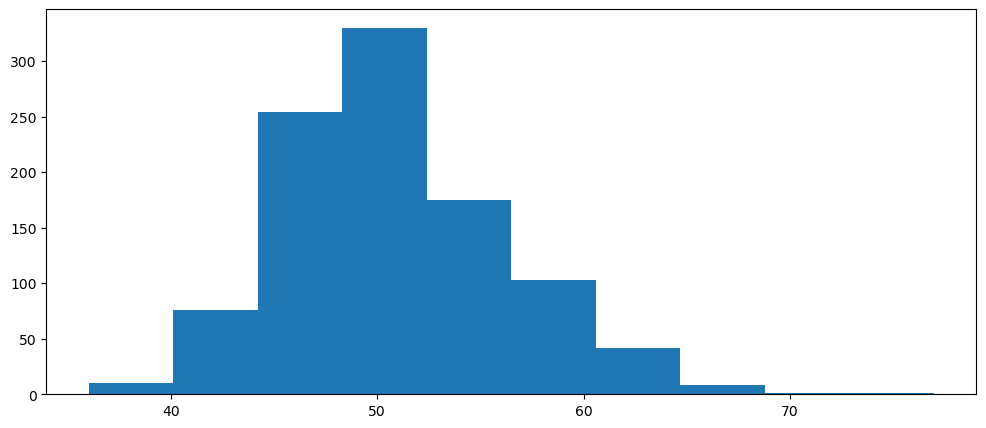

In [22]:
_ = plt.hist(median_difference)

In [20]:
print("95% доверительный интервал для разности медианных времен извержений",  
      boundaries_with_quantiles(median_difference, 0.05))

95% доверительный интервал для разности медианных времен извержений [42. 62.]


Бутстрэп выглядит как совсем магическое ухищрение, но в действительности он очень хорошо работает, а при некоторых ограничениях вид и качество интервала, полученного с помощью бутстрэпа, могут быть оценены в явном виде (но тут уже придется покопаться в математике [посерьезнее](https://www.stat.purdue.edu/~dasgupta/bootstrap.pdf))

In [64]:
a = np.random.lognormal(5,2, 1000)

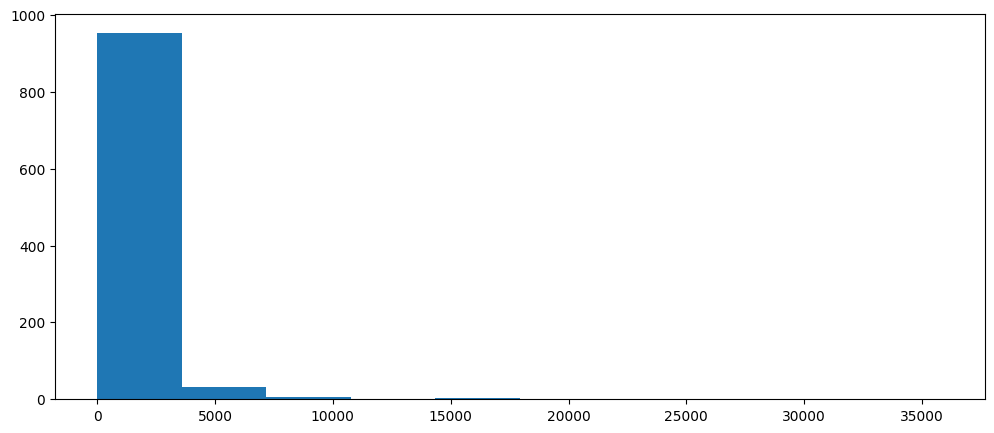

In [66]:
_ = plt.hist(a)

In [77]:
means = np.random.exponential(2, size = (1000, 1000)).mean(axis = 0)

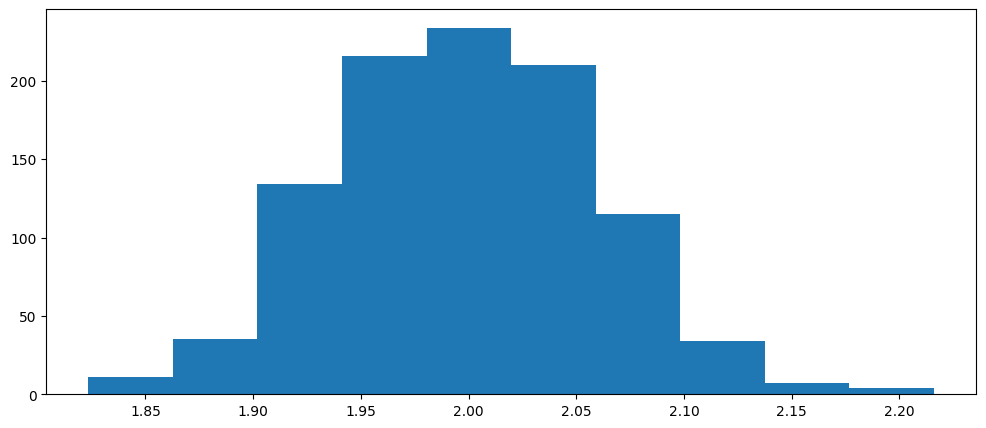

In [79]:
_ = plt.hist(means)

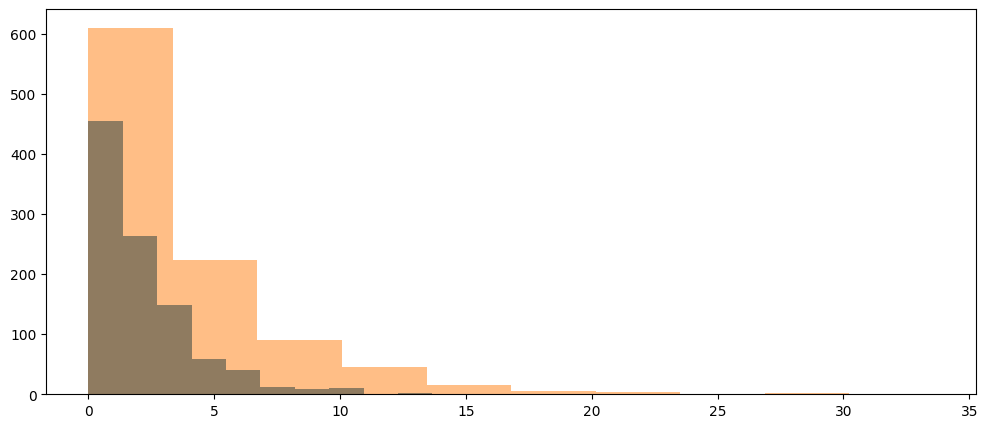

In [82]:
_ = plt.hist(np.random.exponential(2, size = (1000)))
_ = plt.hist(np.random.exponential(4, size = (1000)), alpha = 0.5)

In [86]:
sample = np.array([np.random.exponential(np.random.uniform(2,4), size=1000) for _ in range(1000)])

In [91]:
sample.shape

(1000, 1000)

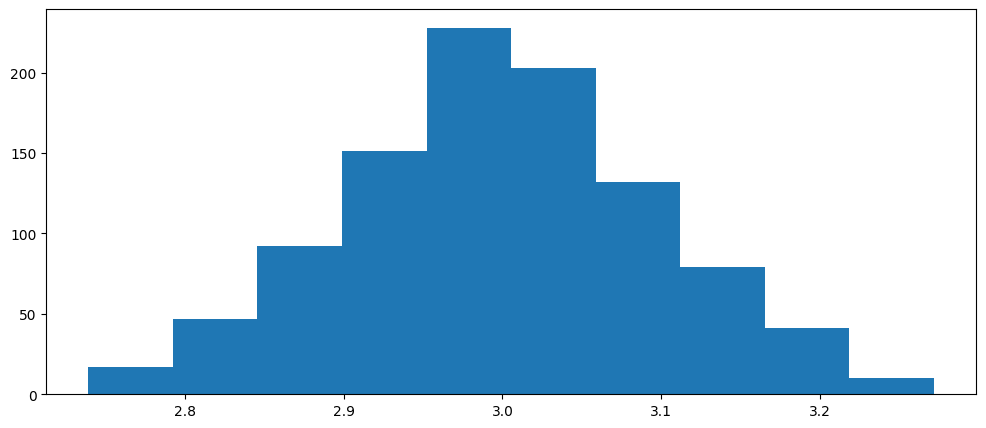

In [92]:
_ = plt.hist(sample.mean(axis = 0))

In [103]:
x = np.random.normal(3,3,size = 10000)
y = np.random.normal(2,3,size = 10000)

In [104]:
(x-y).mean()

0.9918186306846264

In [105]:
(x+y).std()

4.281455141980243

In [106]:
np.sqrt(3**2 +3**2)

4.242640687119285

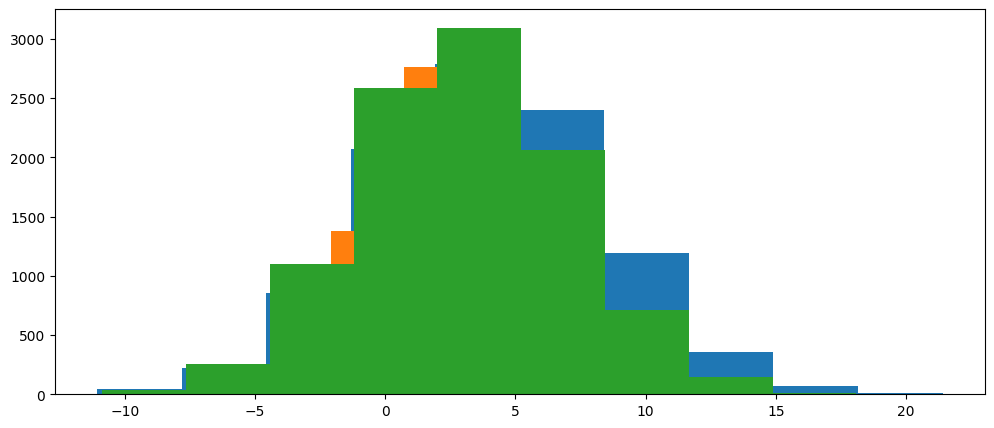

In [97]:
_ = plt.hist(x+y)
_ = plt.hist(x)
_ = plt.hist(y)

# Отличается ли t-распределение от нормального

In [1]:
import numpy as np

In [10]:
x = np.random.exponential(size = 1000)

In [11]:
import matplotlib.pyplot as plt

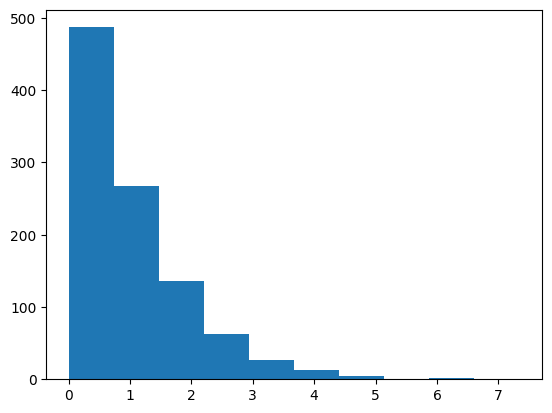

In [12]:
_ = plt.hist(x)

In [13]:
std = x.std()
mean = x.mean()

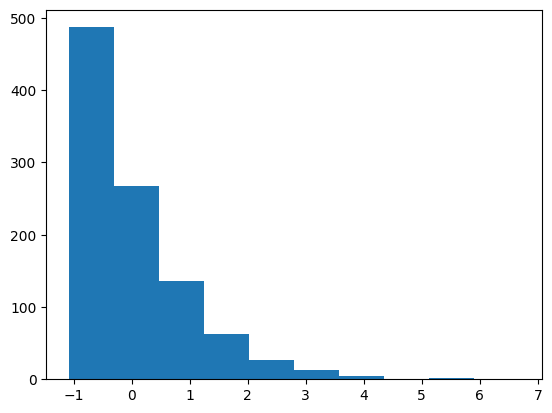

In [14]:
_ = plt.hist((x - mean)/std)

# Посчитаем из этого распределения средние по выборкам

(array([ 41., 188., 268., 225., 147.,  72.,  42.,  13.,   2.,   2.]),
 array([0.34310461, 0.54686019, 0.75061576, 0.95437133, 1.1581269 ,
        1.36188247, 1.56563804, 1.76939361, 1.97314918, 2.17690475,
        2.38066032]),
 <BarContainer object of 10 artists>)

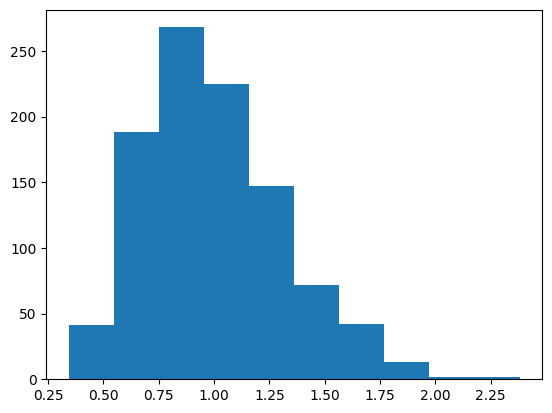

In [28]:
plt.hist(np.random.exponential(size = (10,1000)).mean(axis = 0))

In [29]:
x = np.random.exponential(size = 1000)

In [30]:
x.mean()

0.9813642216039439

In [35]:
np.quantile(np.random.choice(x, replace = True, size = (1000,1000)).mean(axis = 1),q = [0.025,0.975])

array([0.91679599, 1.04663821])

# Пример про чеки

In [51]:
x = np.random.lognormal(1, 1.5, size = 100000)*100
y = np.random.lognormal(1.05, 1.5, size = 100000)*100

In [52]:
x.mean(), y.mean()

(840.3822296292136, 894.0382581681793)

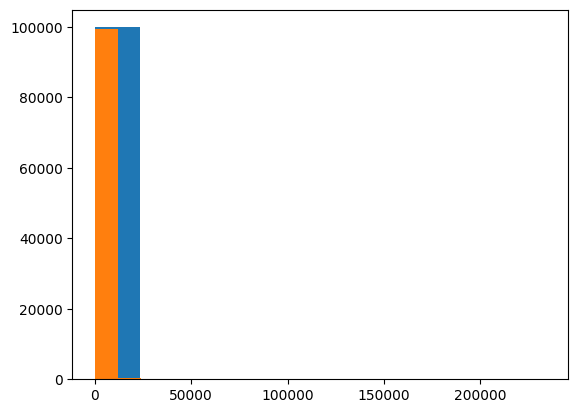

In [53]:
_ = plt.hist(x)
_ = plt.hist(y)

In [54]:
x_means = np.random.choice(x, replace = True, size = (100000,1000)).mean(axis = 0)
y_means = np.random.choice(y, replace = True, size = (100000,1000)).mean(axis = 0)

In [55]:
np.quantile(y_means - x_means,q = [0.025,0.975])

array([32.22387794, 73.85847096])

(array([  2.,   9.,  45., 137., 232., 256., 206.,  92.,  17.,   4.]),
 array([13.56117819, 21.15132508, 28.74147197, 36.33161886, 43.92176575,
        51.51191265, 59.10205954, 66.69220643, 74.28235332, 81.87250021,
        89.4626471 ]),
 <BarContainer object of 10 artists>)

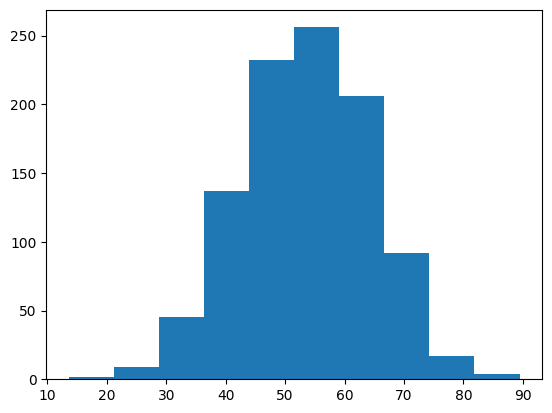

In [56]:
plt.hist(y_means - x_means)

# Интервал на разницу с использованием нормального приближения

In [61]:
xmean = x.mean()
ymean = y.mean()


xvar = x.var()
yvar = y.var()


mean_diff = ymean - xmean

std_diff = np.sqrt(xvar/len(x) + yvar/len(y))

In [62]:
mean_diff-1.96*std_diff, mean_diff+1.96*std_diff

(32.21316083078652, 75.09889624714476)

In [66]:
x = np.random.normal(size = 10000)

In [69]:
x.std()

0.9940420013068109

In [70]:
(x+2).std()

0.9940420013068109

In [73]:
(x*4).var()

15.809912005792796